# INFO 2950 Project Phase II

Tina Chen (tc663), Catherine Fang (cf533), Vicki Chen (vc332)

## Background and Research Questions

Kickstarter is a crowdfunding website that allows creators to create fundraising campaigns to fund startups, products, and projects to help them become a reality. Kickstarter campaigns have many factors that can influnce how likely they are to successfully reach their target fundraising goal. These factors include category of the campaign, location the campaign is based in, original currency of the camapaign, and number of backers. The focus of our research is to examine the factors that lead to a campaign being successful to identify any predictors of campaign success, and determine which factors are the best predictors of a campaign's success. 

The Kickstarter Public Data Dataset we are using has a combination of the publicly available information on past successful and unsuccessful kickstarter projects. The Kickstarter Backers Dataset contains information about the backers of each project. 

Research Question: Are there any relationships between the predictors (category of campaign, location, currency, number of backers) of success and the success of a Kickstarter campaign?
- What is the relationship between the category of the camapaign and the amount successfully fundraised for the campaign
  - Which category has the highest success rate?
- How does the length of a campaign impact the amount of money raised, regardless of whether or not its successful?
  - How does the length of a campaign impact how much a successful campaign exceeds their campaign goal by?
- How do Kickstarter campaign success rates compare for US vs Non-US based projects? 
- How do campaign success rates compare between projects' orignal currencies? 
  - How does the 'strength' of the original currency compared to USD impact the projects' of that currency's success rate?
- How does the fundraising goal impact the amount of money pledged/number of backers/average contribution of backers of successful campaigns?
  - How does the location (US vs Non-US) of backers impact how much, on average they are willing to give to campaigns?


## **Data Description**

The attributes (columns) of the dataset are the PID (Project ID), Category (numbers indicating what topic the project falls under), Subcategory (numbers indicating the subtopics within each category), the Project Location Name, State, County, and Country. Other relevant attributes included are the Project Currency, the Project’s Original Goal (how much money the creators were aiming for), amount of money pledged, the number of backers, the launched date, deadline date, and state. State is defined as either suspended (funding for a project is stopped when the project violates Kickstarter’s rules), canceled (the creators of a project dropped the project themselves), failed (the project didn’t meet funding goals), and successful (project meets funding goals). Each observation (row) corresponds to one unique project, indexed with a CaseID.

The raw dataset was created by Jonathan Leland, Kickstarter’s Head of Insights for a cross-sectional study on the different creative projects that seek crowdfunding. He created the dataset to observe data on the projects from Kickstarter. 

The creation of this dataset is funded by Kickstarter Data, the company crowdfunding platform that directs the Kickstarter Project. The study is distributed through the Inter-University Consortium for Political and Social Research (ICPSR). 

Some columns were presented as optional for users to fill out, so in the raw data there are some rows with missing values. For example, for the PROJECT_LOCATION_STATE, PROJECT_LOCATION_COUNTY, PROJECT_LOCATION_COUNTRY column, there are rows with blank values. However, there are no missing values in the PROJECT_LOCATION_NAME, meaning that the project creators were required to put down the location name for their project. 

ICPSR processed the data by creating variable/value labels, creating an online analysis version with question text, and 
checked the data for undocumented or out-of-range codes. In addition, several restrictions were placed on the data before releasing it for public use to ensure survey participant anonymity. The data was split into a public-use file, a restricted-use file, and file containing information on the backers of campaigns. 

ICPSR datasets are checked for condidentiality of survey participants. The names of the people/groups who created past Kickstarter projects (NAME) and the links to their projects’ websites (URL_NAME), and the descriptions of their projects (BLURB) are not shown in the public data set that was used as the raw dataset for this project. This ensures anonymity of survey participants and prevents disclosure risk from survey participants.

Raw Data was collected by downloading the delimited data from the study at this link, https://www.icpsr.umich.edu/web/ICPSR/studies/38050/summary and Git Large Language Storage was used to upload the raw files onto Github. 

## **Data Cleaning**

Data cleaning was done to create a dataset from the raw data for analysis. After opening the original public_data tsv file, we observed that several variables were not available publicly and were only available in the restricted dataset which we did not have access to. These variables include NAME, URL_NAME, and PROJECT_PAGE_LOCATION_COUNTRY. In addition, there were some rows that had missing values, particularly in the PROJECT_PAGE_LOCATION_STATE, and PROJECT_PAGE_LOCATION_COUNTY columns which may indicate that these are user-inputs that are optional. These columns were dropped.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression 
import seaborn as sns
import duckdb
import datetime
##import timedelta

We imported the data and printed out the first 5 rows to view the columns provided by the dataset.

In [2]:
public_data = pd.read_csv('data/public_data.tsv', delimiter='\t')
public_data.head()

C:\Users\lovet\AppData\Local\Temp\ipykernel_11072\4156237419.py:1: DtypeWarning: Columns (9,11,15) have mixed types. Specify dtype option on import or set low_memory=False.
  public_data = pd.read_csv('data/public_data.tsv', delimiter='\t')


,CASEID,NAME,PID,CATEGORY,SUBCATEGORY,PROJECT_PAGE_LOCATION_NAME,PROJECT_PAGE_LOCATION_STATE,PROJECT_PAGE_LOCATION_COUNTY,PROJECT_PAGE_LOCATION_COUNTRY,UID,PROJECT_CURRENCY,GOAL_IN_ORIGINAL_CURRENCY,PLEDGED_IN_ORIGINAL_CURRENCY,GOAL_IN_USD,PLEDGED_IN_USD,BACKERS_COUNT,LAUNCHED_DATE,DEADLINE_DATE,STATE,URL_NAME
0,1,MASKED BY ICPSR,2137925650,11,301,London,England,Greater London,,1076478145,USD,"100,000,000",0,"$100,000,000",$0,0,8/11/2016,10/10/2016,canceled,MASKED BY ICPSR
1,2,MASKED BY ICPSR,1501531085,11,296,Los Angeles,CA,Los Angeles,,224946798,USD,"100,000,000",85,"$100,000,000",$85,4,12/19/2019,2/14/2020,canceled,MASKED BY ICPSR
2,3,MASKED BY ICPSR,953415668,16,51,Mexico,Baja California,Tijuana,,1772203542,MXN,"100,000,000",10,"$5,219,374",$1,1,3/1/2017,3/22/2017,failed,MASKED BY ICPSR
3,4,MASKED BY ICPSR,1371386304,18,18,Columbus,OH,Franklin,,1373465389,USD,"100,000,000",1,"$100,000,000",$1,1,6/4/2018,7/5/2018,canceled,MASKED BY ICPSR
4,5,MASKED BY ICPSR,1720842777,1,22,Toronto,ON,Toronto,,1455666383,CAD,"100,000,000",0,"$80,610,122",$0,0,5/1/2015,6/30/2015,failed,MASKED BY ICPSR


We checked for duplicates in the public_data.tsv dataset by selecting the rows that appeared more than once according to the unique PID. Since there are no rows that appeared more than once, we know that there is no duplicate PIDs in the dataset.

In [3]:
duckdb.sql("SELECT PID, COUNT(PID) FROM public_data GROUP BY PID HAVING COUNT(PID) > 1").df()

,PID,count(PID)


We dropped the following columns: NAME, PROJECT_PAGE_LOCATION_COUNTRY, and URL_NAME since they contained restricted information that wasn't available to the public. We also dropped the PROJECT_PAGE_LOCATION_STATE and PROJECT_PAGE_LOCATION_COUNTY since they were prone to user-input error and it is not plausible to clean all 600,000+ entries manually.

We also dropped the UID, and the rows that are not successful or failed (canceled or suspended). By definition, a canceled project is one that the project leader has stopped voluntarily and a suspended project is one that was taken down by KickStarter moderators for violating their terms of service or other policies.

We chose to drop the canceled and suspended projects since we do not have further information regarding why they were canceled or suspended, since we do not have access to the project's name or url in the public dataset available to us. We could not make use of canceled or suspended projects in our research question either, since cancellations and suspensions of a campaign are subject to individual's decisions and frequently changing Kickstarter terms and conditions/policies which may vary from individual to individual/year to year.

In [4]:
public_data_df = pd.DataFrame(public_data)
clean_data = public_data_df.drop(columns = ["NAME", "PROJECT_PAGE_LOCATION_COUNTRY", "URL_NAME", "UID", "PROJECT_PAGE_LOCATION_STATE", "PROJECT_PAGE_LOCATION_COUNTY"])

clean_data = duckdb.sql("SELECT * FROM clean_data WHERE STATE = 'successful' OR STATE = 'failed'").df()
clean_data.head()

,CASEID,PID,CATEGORY,SUBCATEGORY,PROJECT_PAGE_LOCATION_NAME,PROJECT_CURRENCY,GOAL_IN_ORIGINAL_CURRENCY,PLEDGED_IN_ORIGINAL_CURRENCY,GOAL_IN_USD,PLEDGED_IN_USD,BACKERS_COUNT,LAUNCHED_DATE,DEADLINE_DATE,STATE
0,56,128197700,12,35,Osaka,JPY,"68,000,000","81,030,744","$623,968","$743,538",12613,3/26/2018,5/5/2018,successful
1,63,1900597540,12,35,Tokyo,JPY,"53,808,516","481,621,841","$510,735","$4,571,420",46307,7/27/2020,8/29/2020,successful
2,83,1012629901,12,35,Ishikawa,JPY,"45,000,000","98,863,825","$414,327","$910,266",8051,6/3/2019,6/11/2019,successful
3,175,596722349,12,35,Chiba-shi,JPY,"16,665,000","23,606,140","$148,285","$210,047",1705,9/20/2018,10/20/2018,successful
4,184,2056420743,16,337,Tokyo,JPY,"15,000,000","17,406,300","$133,229","$154,601",656,10/7/2017,12/6/2017,successful


We also changed all the numerical string values in the dataframe into integers for us to work with. 

In [5]:
clean_data["GOAL_IN_ORIGINAL_CURRENCY"] = clean_data["GOAL_IN_ORIGINAL_CURRENCY"].replace({',': ''}, regex=True).astype(int)
clean_data["PLEDGED_IN_ORIGINAL_CURRENCY"] = clean_data["PLEDGED_IN_ORIGINAL_CURRENCY"].replace({',': ''}, regex=True).astype(int)
clean_data["GOAL_IN_USD"] = clean_data["GOAL_IN_USD"].replace({'[\$]': '',',': ''}, regex=True).astype(int)
clean_data["PLEDGED_IN_USD"] = clean_data["PLEDGED_IN_USD"].replace({'[\$]': '',',': ''}, regex=True).astype(int)
clean_data.head()

<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:3: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
C:\Users\lovet\AppData\Local\Temp\ipykernel_11072\478761548.py:3: SyntaxWarning: invalid escape sequence '\$'
  clean_data["GOAL_IN_USD"] = clean_data["GOAL_IN_USD"].replace({'[\$]': '',',': ''}, regex=True).astype(int)
C:\Users\lovet\AppData\Local\Temp\ipykernel_11072\478761548.py:4: SyntaxWarning: invalid escape sequence '\$'
  clean_data["PLEDGED_IN_USD"] = clean_data["PLEDGED_IN_USD"].replace({'[\$]': '',',': ''}, regex=True).astype(int)


,CASEID,PID,CATEGORY,SUBCATEGORY,PROJECT_PAGE_LOCATION_NAME,PROJECT_CURRENCY,GOAL_IN_ORIGINAL_CURRENCY,PLEDGED_IN_ORIGINAL_CURRENCY,GOAL_IN_USD,PLEDGED_IN_USD,BACKERS_COUNT,LAUNCHED_DATE,DEADLINE_DATE,STATE
0,56,128197700,12,35,Osaka,JPY,68000000,81030744,623968,743538,12613,3/26/2018,5/5/2018,successful
1,63,1900597540,12,35,Tokyo,JPY,53808516,481621841,510735,4571420,46307,7/27/2020,8/29/2020,successful
2,83,1012629901,12,35,Ishikawa,JPY,45000000,98863825,414327,910266,8051,6/3/2019,6/11/2019,successful
3,175,596722349,12,35,Chiba-shi,JPY,16665000,23606140,148285,210047,1705,9/20/2018,10/20/2018,successful
4,184,2056420743,16,337,Tokyo,JPY,15000000,17406300,133229,154601,656,10/7/2017,12/6/2017,successful


We also checked for NaaN values by checking if there were any rows where the BACKERS_COUNT is null and if it was an empty string. We didn't realize until we started creating scatterplots that there were other inputs like Strings containg a single space that were still lying in our data. 

We also checked for oddities and outliers. For instance, we found rows where the BACKERS_COUNT variable was Null so we cross examined what values the identified rows' PLEDGED_IN_ORIGINAL_CURRENCY columns had to see if the value was 0 or was not 0. If it was 0, then we replaced the NaaN values with 0 since we can assume the number of backers is 0 since no money was pledged by no people. 

*** Need to decide what to do with the NaN values that have non-zero values in their PLEDGED_IN_ORIGINAL_CURRENCY column.

In [6]:
backers_count_null = duckdb.sql("SELECT * FROM clean_data WHERE BACKERS_COUNT IS NULL ").df()
print("The number of rows where BACKERS_COUNT is Null: " + str(len(backers_count_null)))

backers_count_null = duckdb.sql("SELECT * FROM clean_data WHERE BACKERS_COUNT = ''  ").df()
print("The number of rows where BACKERS_COUNT is an Empty String: " + str(len(backers_count_null)))

backers_count_null = duckdb.sql("SELECT * FROM clean_data WHERE BACKERS_COUNT = ' ' ").df()
print("The number of rows where BACKERS_COUNT is a String containing a space: " + str(len(backers_count_null)))

clean_data = duckdb.sql("SELECT * FROM clean_data WHERE NOT BACKERS_COUNT = ' '").df()
print("Cleaned the rows that contained a String with a single space")

backers_count_null = duckdb.sql("SELECT * FROM clean_data WHERE BACKERS_COUNT = ' ' ").df()
print("The number of rows where BACKERS_COUNT is a String containing a space: " + str(len(backers_count_null)))
clean_data["BACKERS_COUNT"] = clean_data["BACKERS_COUNT"].astype(int)

The number of rows where BACKERS_COUNT is Null: 0
The number of rows where BACKERS_COUNT is an Empty String: 0
The number of rows where BACKERS_COUNT is a String containing a space: 56
Cleaned the rows that contained a String with a single space
The number of rows where BACKERS_COUNT is a String containing a space: 0


We converted the LAUNCHED_DATE and DEADLINE_DATE to datetime objects so we could do math with the two dates to get the length of each campaign.

We then calculated the difference between the DEADLINE_DATE and LAUNCHED_DATE to get the in days that each project fundraiser ran for and added it as a new column to the clean_data. 

In [7]:
clean_data['LAUNCHED_DATE'] = pd.to_datetime(clean_data['LAUNCHED_DATE'], format = 'mixed')
clean_data['DEADLINE_DATE'] = pd.to_datetime(clean_data['DEADLINE_DATE'], format = 'mixed')

clean_data['time_difference_days'] = (clean_data['DEADLINE_DATE'] - clean_data['LAUNCHED_DATE']).dt.days
#test = duckdb.sql("SELECT * FROM clean_data WHERE time_difference_days = 0")
#print(test)
clean_data.head()

,CASEID,PID,CATEGORY,SUBCATEGORY,PROJECT_PAGE_LOCATION_NAME,PROJECT_CURRENCY,GOAL_IN_ORIGINAL_CURRENCY,PLEDGED_IN_ORIGINAL_CURRENCY,GOAL_IN_USD,PLEDGED_IN_USD,BACKERS_COUNT,LAUNCHED_DATE,DEADLINE_DATE,STATE,time_difference_days
0,56,128197700,12,35,Osaka,JPY,68000000,81030744,623968,743538,12613,2018-03-26,2018-05-05,successful,40
1,63,1900597540,12,35,Tokyo,JPY,53808516,481621841,510735,4571420,46307,2020-07-27,2020-08-29,successful,33
2,83,1012629901,12,35,Ishikawa,JPY,45000000,98863825,414327,910266,8051,2019-06-03,2019-06-11,successful,8
3,175,596722349,12,35,Chiba-shi,JPY,16665000,23606140,148285,210047,1705,2018-09-20,2018-10-20,successful,30
4,184,2056420743,16,337,Tokyo,JPY,15000000,17406300,133229,154601,656,2017-10-07,2017-12-06,successful,60


We now decided we should split the data into two dataframes based on PROJECT_CURRENCY, one that contains projects that used USD as its original currency and the other that contains projects that used Non-USD currencies as its original currency. 

In [8]:
us_currency = duckdb.sql("SELECT * FROM clean_data WHERE PROJECT_CURRENCY = 'USD'").df()
non_us_currency = duckdb.sql("SELECT * FROM clean_data WHERE NOT PROJECT_CURRENCY = 'USD'").df()
# print(us_currency.size)
# print(non_us_currency.size)

We changed the LAUNCHED_DATE and DEADLINE_DATE to only the corresponding year as we intend to analyzing the years that the campaigns were launched and finished in. 

In [9]:
clean_data['LAUNCHED_DATE'] = clean_data['LAUNCHED_DATE'].dt.year
clean_data['DEADLINE_DATE'] = clean_data['DEADLINE_DATE'].dt.year
clean_data.head()
print(clean_data.loc[20:50,])

    CASEID         PID  CATEGORY  SUBCATEGORY PROJECT_PAGE_LOCATION_NAME  \
20     491  1100521704        12           34                      Tokyo   
21     529  1557620183        11           29                      Tokyo   
22     551   715478163        16          337                  Stockholm   
23     569  1547674121        11           29                      Tokyo   
24     573  1133115486        11           31                      Tokyo   
25     607  1298678643        16           52                      Tokyo   
26     637   602404695         7           28                      Tokyo   
27     643  1801038857         7           28                  Kyoto-shi   
28     650  2025152755        12          270                   New York   
29     674  1653241952        26          356                  Kyoto-shi   
30     682  1655808289        16          339                      Tokyo   
31     686   453272263        10          312                  Kyoto-shi   
32     699  

## **Exploratory Data Analysis**

We split the projects based on successful and failed campaign projects as we wanted to analyze the relationship between specific factors for successful projects compared to failed projects.

In [10]:
success_proj = duckdb.sql("SELECT * FROM clean_data WHERE STATE ='successful'").df()
failed_proj = duckdb.sql("SELECT * FROM clean_data WHERE STATE ='failed'").df()

#### **Year vs Campaigns**

We wanted to explore the Kickstarter campaigns with the years that the campaigns were created. This would allow us to observe any trends related to projects over time and the success rates of projects over time. First, we determined what the range of the years was. 

In [11]:
clean_data["LAUNCHED_DATE"].unique()

array([2018, 2020, 2019, 2017, 2015, 2013, 2014, 2012, 2016, 2010, 2011,
       2009, 2023, 2022, 2021])

**Bargraph of Number of Campaigns Launched per Year**

We plotted the year the Kickstarter campaign was launched versus the number of Kickstarter campaigns in that year.

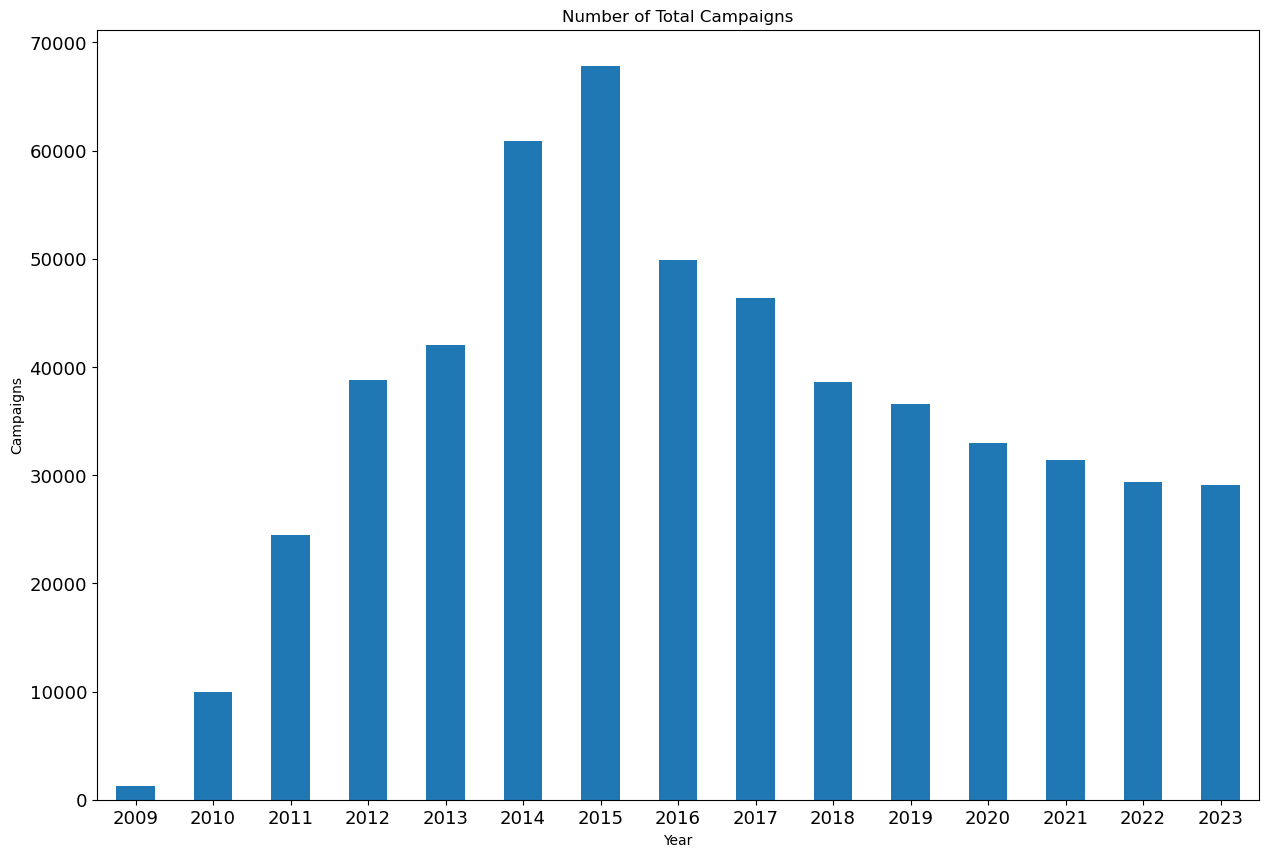

In [12]:
campaigns_by_yr = clean_data["LAUNCHED_DATE"].value_counts().sort_index(axis=0).plot(kind= "bar", 
                    rot = 0, figsize = (15, 10), fontsize = 13, title = "Number of Total Campaigns");
campaigns_by_yr.set_xlabel("Year")
campaigns_by_yr.set_ylabel("Campaigns")
plt.show()

In the above bargraph, we can observe that the campaigns launched over time follow somewhat of a bellcurve shape. The year 2015 had the highest number of campaigns launched. While the years before 2012 had a lower amount of campaigns launched, with 2009 having having the least amount of launched campaigns. However, this correlates with the fact that Kickstarter officially launched in April 2009. 

**Bargraph of Number of Successful Campaigns Launched per Year**

We then wanted to explore if successful projects would follow a similar trend and plotted the year the Kickstarter campaign was launched versus the number of successful Kickstarter campaigns in that year.

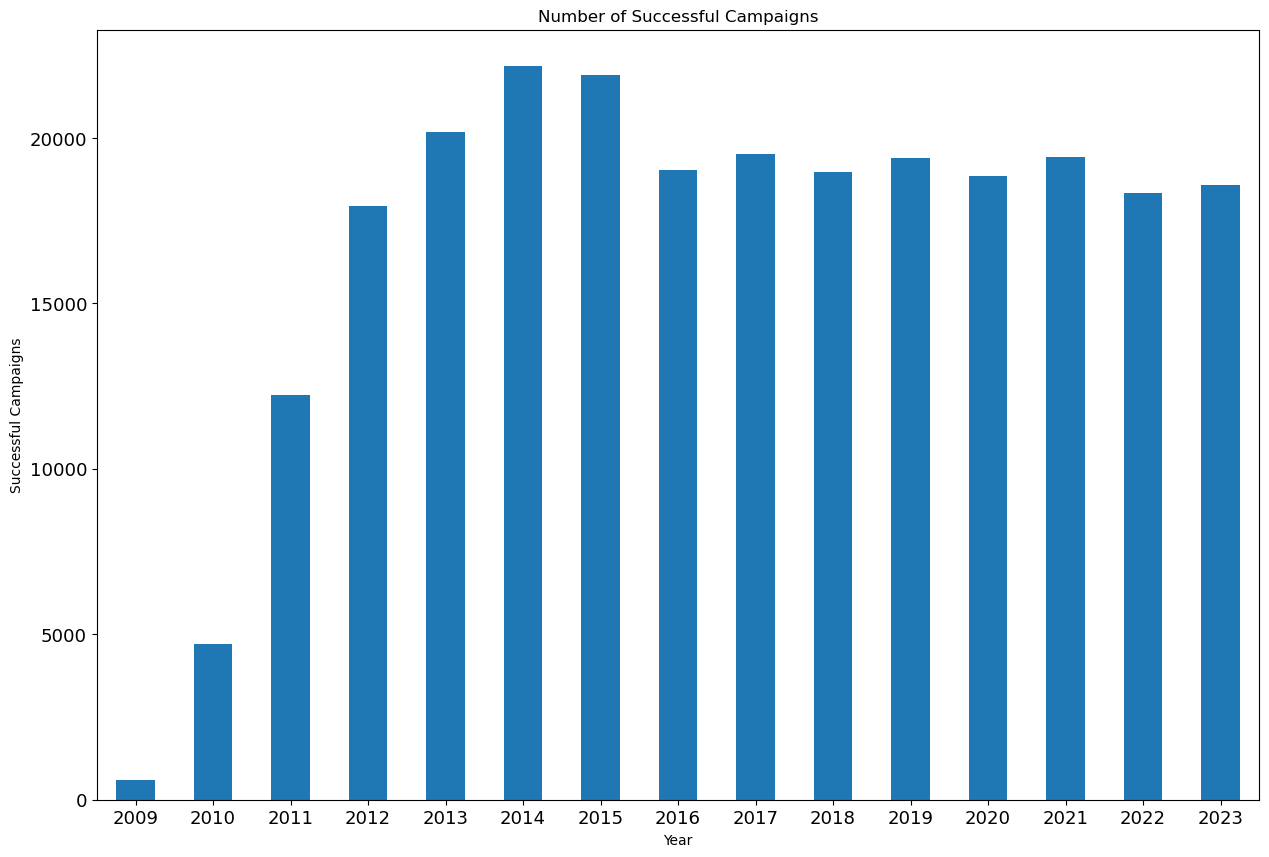

In [13]:
success_campaigns_by_yr = success_proj["LAUNCHED_DATE"].value_counts().sort_index(axis=0).plot(kind= "bar", 
                        rot = 0, figsize = (15, 10), fontsize = 13, title = "Number of Successful Campaigns");
success_campaigns_by_yr.set_xlabel("Year")
success_campaigns_by_yr.set_ylabel("Successful Campaigns")
plt.show()

Interestingly, the number of successful campaigns showed a more consistent trend than that of the total successful and failed campaigns in the dataset. The highest number of successful campaigns was in 2014. 

#### **Backers vs Campaign Goal**

We want to visualize the relationship between the number of backers and the campaign goal for successful projects. We want to see if there is a relationship between how many backers there are and the campaign goal.

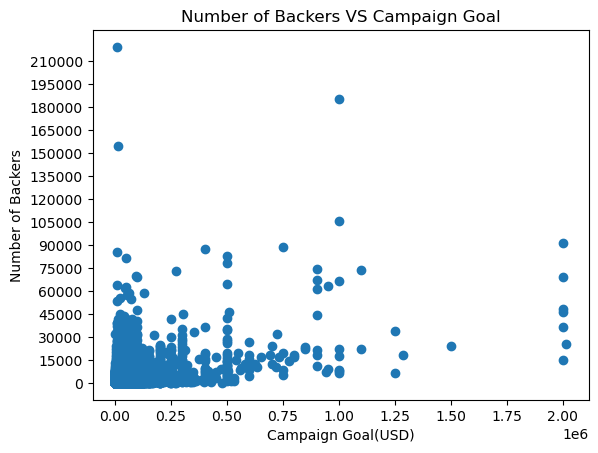

In [14]:
plt.scatter(success_proj["GOAL_IN_USD"], success_proj["BACKERS_COUNT"])
plt.title("Number of Backers VS Campaign Goal")
plt.xlabel("Campaign Goal(USD)")
plt.ylabel("Number of Backers")
plt.yticks(np.arange(0,max(success_proj["BACKERS_COUNT"]), step=15000))
plt.show()

In [15]:
backers_goal_pscore = success_proj["GOAL_IN_USD"].corr(success_proj["BACKERS_COUNT"], method = "pearson")
backers_goal_sscore = success_proj["GOAL_IN_USD"].corr(success_proj["BACKERS_COUNT"], method = "spearman")
print(f"The Pearson Correlation between campaign goal in USD and number of backers for successful campaigns is {np.round(backers_goal_pscore, 2)}")
print(f"The Spearman Correlation between campaign goal in USD and number of backers for successful campaigns is {np.round(backers_goal_sscore, 2)}")

The Pearson Correlation between campaign goal in USD and number of backers for successful campaigns is 0.45
The Spearman Correlation between campaign goal in USD and number of backers for successful campaigns is 0.64


The Pearson correlation score is 0.45 while the Spearman correlation score of 0.64 which indicates that there may be large outliers that impact the Pearson correlation. However, this information does not indicate anything about the amount that each backer has pledged to the Kickstarter campaigns. 

#### **Categories vs Success**

We want to analyze the relationship between the category and the number of successful projects to determine if there are certain categories that lead to more successful campaigns. 

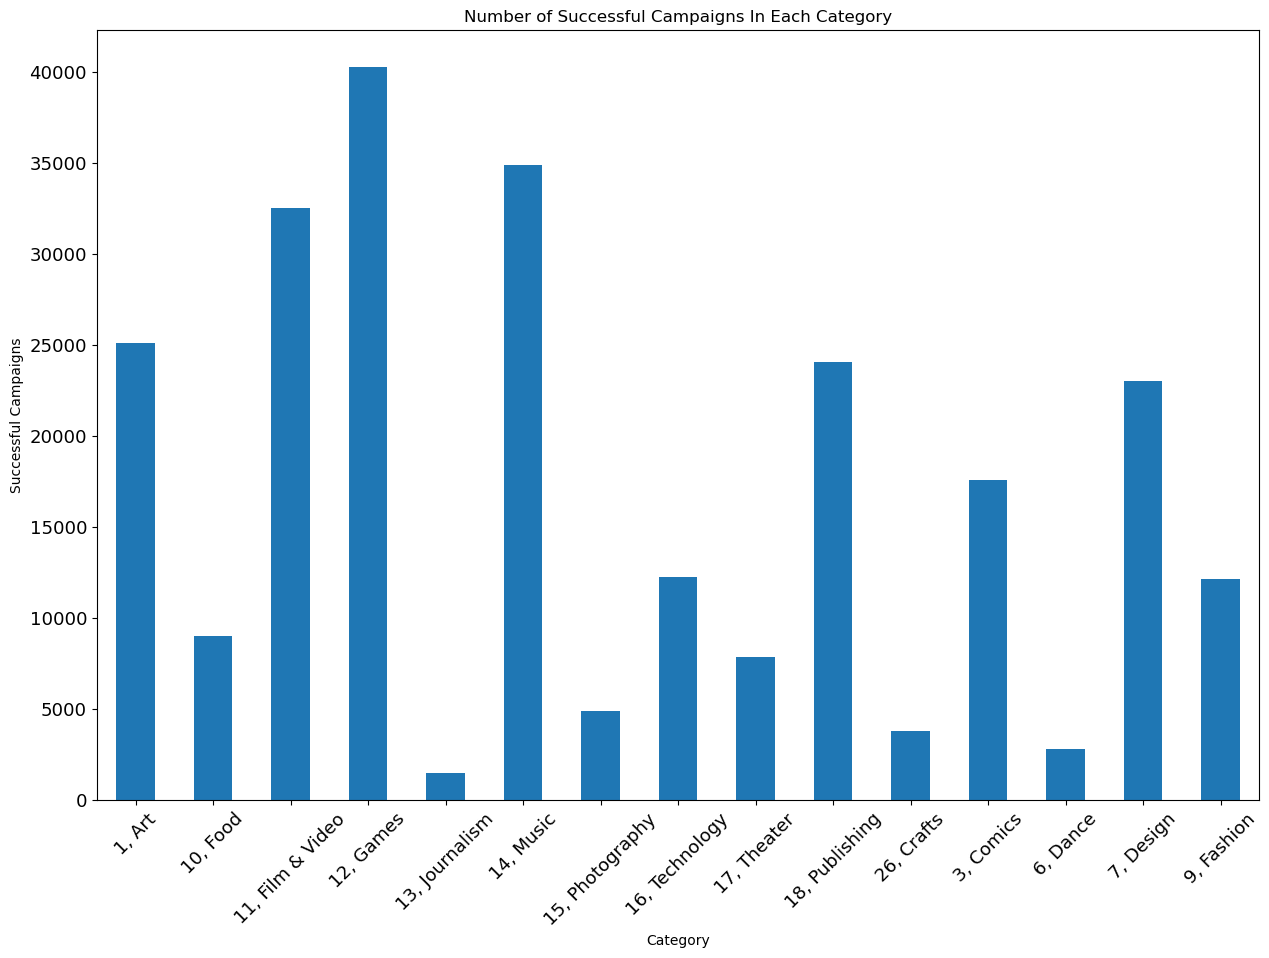

In [16]:
success_proj["CATEGORY"] = success_proj["CATEGORY"].astype(str)
success_proj["CATEGORY"] = success_proj["CATEGORY"].replace({"1" : "1, Art",  
"3": "3, Comics", "6": "6, Dance", "7": "7, Design", "9": "9, Fashion", 
"10": "10, Food", "11": "11, Film & Video", "12": "12, Games", 
"13": "13, Journalism", "14": "14, Music", "15": "15, Photography", 
"16": "16, Technology", "17": "17, Theater", "18": "18, Publishing", "26": "26, Crafts"})

category_success = success_proj["CATEGORY"].value_counts().sort_index(axis=0).plot(kind= "bar", 
                    rot = 45, figsize = (15, 10), fontsize = 13, 
                    title = "Number of Successful Campaigns In Each Category")
category_success.set_xlabel("Category")
category_success.set_ylabel("Successful Campaigns")
plt.show()

This bargraph depicts that the category with the greatest number of successful campaigns is category 12 (Games), while the category with the least number of successful campaigns is category 13 (Journalism). 

We wanted to analyze the relationship between categories and the project's campaign goals (in USD) for all successful projects, to see which categories
had the higher goals than the others, and whether it's a combination of categories and goals that influenced success, or perhaps one influenced the other.
when we run regressions later on Category vs Success and Goals vs Success, we'll take into account which categories has the highest/lowest goals to watch 
out for collinearity of inputs. 

In [17]:
categories = duckdb.sql("SELECT CATEGORY FROM success_proj GROUP BY CATEGORY").df()
category = np.arange(len(list(categories)))
ax.barh(category, success_proj["GOAL_IN_USD"])
ax.set_yticks(category, labels=success_proj["CATEGORY"])
ax.set_xlabel("Campaign Goals")
ax.set_title("Category vs Campaign Goals for Successful Projects")

NameError: name 'ax' is not defined

We analyze the relationship between categories and the project's Campaign Goals (in USD) for failed projects. 

In [30]:
plt.scatter(failed_proj["GOAL_IN_USD"], failed_proj["CATEGORY"])
plt.xlabel("Campaign Goal (USD)")
plt.ylabel("Category")
plt.title("Category vs Campaign Goal for Failed Projects")
plt.show()

#### **Currency vs Success**

We created a new dataframe named 'currency_success_df' to better understand the project's currency, number of successful projects for each respective currency, the total number of projects for each respective currency, to calculate the success rate for projects of each respective currency.

We also calculated the total number of different original currencies there were, which was 15. We also calculated the average success rate across all currencies. 

In [31]:
currency_success_df = duckdb.sql("""
SELECT 
    PROJECT_CURRENCY AS project_currency,
    SUM(CASE WHEN STATE = 'successful' THEN 1 END) AS num_successful,
    COUNT(*) AS total_projects,
    CASE 
        WHEN COUNT(*) = 0 THEN 0
        ELSE COUNT(CASE WHEN STATE = 'successful' THEN 1 END) * 1.0 / COUNT(*)
    END AS success_rate
FROM 
    clean_data 
GROUP BY 
    PROJECT_CURRENCY
ORDER BY num_successful DESC
""").df()

num_diff_currencies = len(currency_success_df)
print(f"The number of different currencies is: {num_diff_currencies}")

avg_success_rate = currency_success_df['success_rate'].mean()
print(f"The average success rate of all currencies is {avg_success_rate:.2f}")

currency_success_df.iloc[:5]

The number of different currencies is: 15
The average success rate of all currencies is 0.46


,project_currency,num_successful,total_projects,success_rate
0,USD,178334.0,381263,0.467745
1,GBP,28143.0,55268,0.509210
2,EUR,17256.0,41487,0.415938
3,CAD,10908.0,23889,0.456612
4,AUD,5162.0,12353,0.417874


In [95]:
currency_success = plt.barh(currency_success_df["project_currency"], currency_success_df["success_rate"])
plt.xlabel("Success Rate")
plt.ylabel("Currency")
plt.title("Success Rate for Different Currencies")
plt.show()

It appears that campaings listed with the currency HKD has the highest success rate of the Kickstarter campaigns, while campaigns with the currency MXN has the lowest success rate. 

### Regression Models

We then made the categorical variable, STATE, into a binary variable so we can run logit on it with other variables later to find possible predictors for the success and/or failure of a project.

In [32]:
clean_data["STATE"] = pd.get_dummies(clean_data["STATE"], dtype=int, drop_first=True)

We run a logistic regression to see the relationship between campaign goals and the success of a project. We hypothesize that if a project sets a higher goal, then they may do more to achieve that goal (such as promoting, advertising, improving quality of project, etc.), and that attracts more funds pledged to the project. 

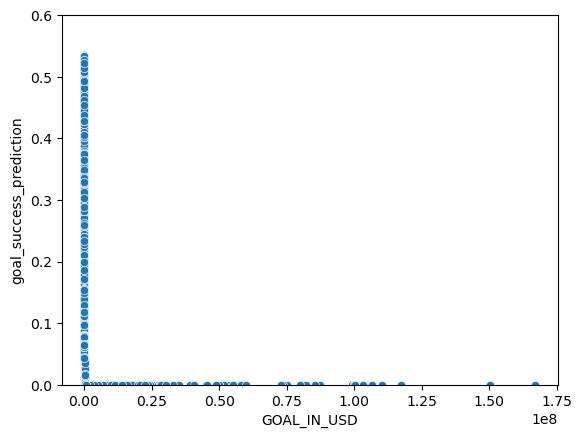

In [33]:
X = pd.DataFrame(clean_data["GOAL_IN_USD"])
y = pd.Series(clean_data["STATE"])
goal_model = LogisticRegression().fit(X,y)
goal_prediction = goal_model.predict_proba(X)
goal_success = goal_prediction[:,1]
clean_data["goal_success_prediction"] = goal_success
sns.scatterplot(clean_data, x = "GOAL_IN_USD", y = "goal_success_prediction")
plt.ylim(0,0.6)
#plt.xlim(0,0.5)
plt.show()

We run a regression on the length of time of a project and its probability of success. We hypothesize that a project that has been running longer may have more time to promote and find backers, and so might have a higher probability of success. 

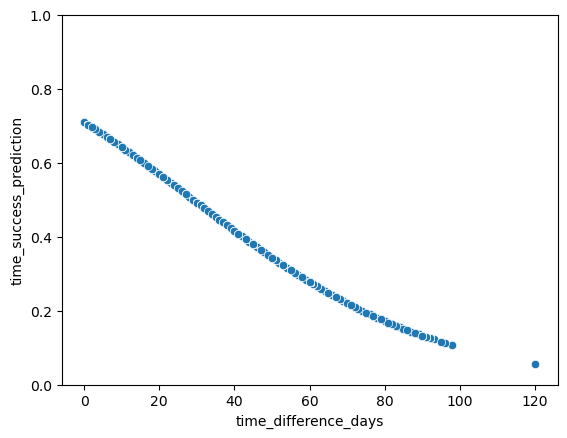

In [63]:
X1 = pd.DataFrame(clean_data["time_difference_days"])
y1 = pd.Series(clean_data["STATE"])
time_model = LogisticRegression().fit(X1,y1)
time_prediction = time_model.predict_proba(X1)
time_success = time_prediction[:,1]
clean_data["time_success_prediction"] = time_success
sns.scatterplot(clean_data, x = "time_difference_days", y = "time_success_prediction")
plt.ylim(0,1)
plt.show()

## **Data Limitations**

There are several limitations to our research as the data is limited to the Kickerstarter public dataset. Since many variables on our public data tsv are restricted, including the project description, we can’t draw a clear relationship between what exactly about a specific category that leads to it being more or less successful than other categories. This affects the meaning of our results because there are unclear causes that may have a greater impact on how successful a project is. We could only rely on the Category and Subcategory columns for each project.

There may be outside factors such as branding, social media presence, and popularity of the project before it was put on Kickstarter that may affect the success of the project. These confounding variables can skew our results. 

The cleaned dataset used was also limited as we only used a portion of all the Kickerstarter projects. We  decided to remove projects that were did not have a STATE of success or failed, which were cancelled and suspended campaigns. This indicates that our data analysis is based on solely on success or failed projects, and does not take into account cancelled or suspended campaigns. 


## **Questions For Reviewers**

1. Do you recommend normalizing